
<h1><center>Estudio de probabilidades de un oscilador armónico y un oscilador anarmónico mediante matrix squaring, propiedad de convolución de las matrices de densidad e integrales de camino</center></h1>
<h3><center>Ana Cristina Molina - CC.1044508251<br>
Universidad de Antioquia<br>
anac.molina@udea.edu.co</center></h3>

<h4><center> Resumen: <br>
<font size=4> Este es el resumen </center></h4>

## Introducción

El objetivo de este trabajo es usar matrix squaring y la integrales de camino para calcular las probabilidades asociadas a partículas que se mueven en potenciales armónicos y anarmónicos y concluir sobre la efectividad de estos métodos.

In [28]:
# Load libraries
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import matplotlib.pyplot as plt

In [29]:
# Define the harmonic oscillator potential

def harmonic_potential(x):
    """Quamtum armonic oscillator potential
    
    Args:
        x (float): position of the particle
    Returns:
        float: value of the potential at x"""
    return 0.5*x**2

# Define the anharmonic oscillator potential
def anharmonic_potential(x):
    """Quamtum anharmonic oscillator potential
    
    Args:
        x (float): position of the particle
    Returns:
        float: value of the potential at x"""
    return 0.5*x**2 - x**3 + x**4

# Define rho_free function
def rho_free(x, xp, beta):
    """ Free off-diagonal density matrix 
    Args:
        x (float): position of the particle
        xp (float): prima position of the particle
        beta (float): inverse temperature
    Returns:
        float: value of the density matrix at x and xp and beta
    """
    return np.exp(-(x - xp) ** 2 / (2.0 * beta)) / np.sqrt(2.0 * np.pi * beta)

# Define the density matrix in the Trotter approximation
def rho_harmonic_trotter(grid, beta, potential):
    """ Harmonic density matrix in the Trotter approximation 
    Args:
        grid (float): grid of positions of the particle
        beta (float): inverse temperature
    Returns:
        float: value of the density matrix at x and xp and beta
    """
    return np.array([[rho_free(x, xp, beta) * np.exp(-0.5 * beta * (potential(x) + potential(xp))) #)0.5 * (x ** 2 + xp ** 2))
                      for x in grid] for xp in grid])

# Define theorical probability density function
def analytic_quantum_probability(x, beta):
    """Analytic quantum probability of the harmonic oscillator
    Args:
        x (float): position of the particle
        beta (float): inverse temperature
    Returns:
        float: probability of the particle being at x and beta"""
    return np.sqrt(np.tanh(beta/2.0)/np.pi) * np.exp(- x**2.0 * np.tanh(beta/2.0))

In [30]:
# Configuration for text sizes in plots

MEDIUM_SIZE = 12
BIGGER_SIZE = 12

plt.rc('font', size=MEDIUM_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)     # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)   # fontsize of the figure title

In [31]:
# Define the convolution function

def convolution(x_max, nx, beta, potential, beta_temp=2.0 ** (-5), return_betas_Zs=False):
    
    """Compute the convolution until reach beta value
    Args:
        x_max (float): maximum value of the position
        nx (int): number of points in the grid
        beta (float): inverse temperature
        potential (function): potential energy function
        beta_temp (float): initial inverse temperature
        return_betas_Zs (bool): if True, return the list of betas and Zs computed
    Returns:
        x (float): grid of positions
        dx (float): differential of x
        rho (float): density matrix
        Z (float): partition function
        pi_of_x (float): probability of the particle being at x    
    """

    dx = 2.0 * x_max / (nx - 1) # Compute the differential of x
    x = np.array([i * dx for i in range(-(nx - 1) // 2, nx // 2 + 1)]) # Compute the grid of positions

    if return_betas_Zs: # If return_betas_Zs is True, then we will return the list of betas and Zs computed
        betas = []
        Zs = []

    # Initial density matrix with beta_temp
    rho = rho_harmonic_trotter(x, beta_temp, potential)
    
    # Compute the convolution until reach beta value
    while beta_temp < beta:
        rho = np.dot(rho, rho)
        rho *= dx
    
        # If return_betas_Zs is True, then we will return the list of betas and Zs computed
        if return_betas_Zs:
            Z = sum(rho[j, j] for j in range(nx + 1)) * dx
            betas.append(beta_temp)
            Zs.append(Z)

        beta_temp *= 2.0

    # Compute the partition function and the probability of the particle being at x
    Z = sum(rho[j, j] for j in range(nx + 1)) * dx
    pi_of_x = np.array([rho[j, j] / Z for j in range(nx + 1)])

    # If return_betas_Zs is True, then we will return the list of betas and Zs computed
    if return_betas_Zs:
        return x, dx, rho, betas, Zs
    # If return_betas_Zs is False, then we will return the partition function and the probability of the particle being at x
    else:
        return x, dx, rho, Z, pi_of_x

In [32]:
# Define function to read a file with two columns and returns two lists
def read_file(filename):
    
    """Reads a file with two columns and returns two lists
    Args:
        filename (string): name of the file
    Returns:
        list: list of the first column
        list: list of the second column
    """

    # Empty lists
    list_x = []
    list_y = []

    # Open file object
    with open(filename) as f:
        # Read file line by line 
        for line in f:
            x, y = line.split()
            # Append values to lists
            list_x.append(float(x))
            list_y.append(float(y))
    # Close file object
    f.close()
    
    # Return lists
    return list_x, list_y

## Potencial Armónico

$$
V(x) = \frac{1}{2} x^2
$$

Text(0, 0.5, '$V(x)$')

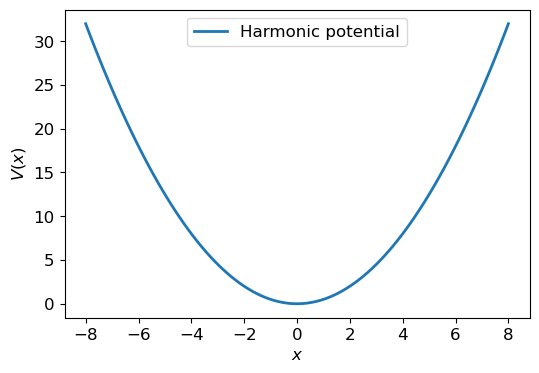

In [33]:
new_grid = np.linspace(-8, 8, 100)

plt.figure(figsize=(6, 4))
plt.plot(new_grid, harmonic_potential(new_grid), '-', linewidth=2, label='Harmonic potential')
plt.legend()
plt.xlabel(r'$x$')
plt.ylabel(r'$V(x)$')

In [34]:
# TODO
# Describe Harmonic potential
# Symmmetry properties

## La fórmula de Trotter

$$
\rho(x, x', \beta) \rightarrow e^{-\frac{1}{2}\beta V(x)} \rho^{free}(x, x', \beta) e^{-\frac{1}{2}\beta V(x)}
$$

## Propiedad de la convolución de la matriz de densidad

$$
\rho(x, x'', 2\beta) = \int dx' \rho(x, x', \beta) \rho(x', x'', \beta)
$$

### $\pi(x)$ cuando $\beta = 4$ para un oscilador armónico

(-2.0, 2.0)

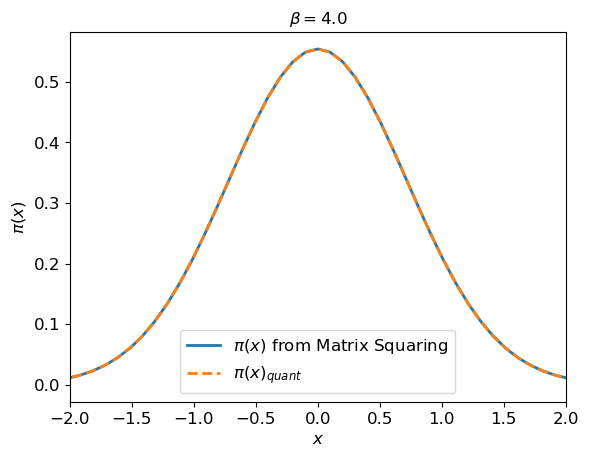

In [35]:
x_max = 5.0                              # maximum value of the position
nx = 100                                 # number of points in the grid
beta = 4.0                               # inverse temperature

x, dx, rho, Z, pi_of_x = convolution( x_max, nx, beta, harmonic_potential)

f = open('data_harm_matrix_squaring_beta' + str(beta) + '.dat', 'w')
for j in range(nx + 1):
    f.write(str(x[j]) + ' ' + str(rho[j, j] / Z) + '\n')
f.close()

plt.figsize=(6, 4)
plt.title(r'$\beta = %s$' % beta)
plt.plot(x, pi_of_x, linewidth=2, label='$\pi(x)$ from Matrix Squaring')
plt.plot(x, [analytic_quantum_probability(x, beta) for x in x], '--', linewidth=2, label='$\pi(x)_{quant}$')
plt.legend()
plt.xlabel(r'$x$')
plt.ylabel(r'$\pi(x)$')
plt.xlim(-2, 2)

- Explique por qué a alta temperatura, la matriz densidad del oscilador
armónico cuántico $\rho(x, x, \beta)$ es casi clásica.

Se tiene que la matriz densidad para el oscilador armónico cuántico es:

$$
\pi_{quant}(x) = \sqrt{\tanh(\beta/2)/\pi} \exp{(-x^2 \tanh
(\beta/2))}
$$

cuando se tienen temperaturas altas implica que $\beta \rightarrow 0$, por lo cual, $\tanh(\beta/2) \rightarrow \beta/2$

$$
\pi_{class}(x) = \sqrt{\beta/(2\pi)} \exp{(-x^2 \frac{\beta}{2})}
$$

### Exploración de parámetros $dx$ y $\beta$ temp

#### Variando dx a partir de x_max y usando $\beta = 4$ fijo

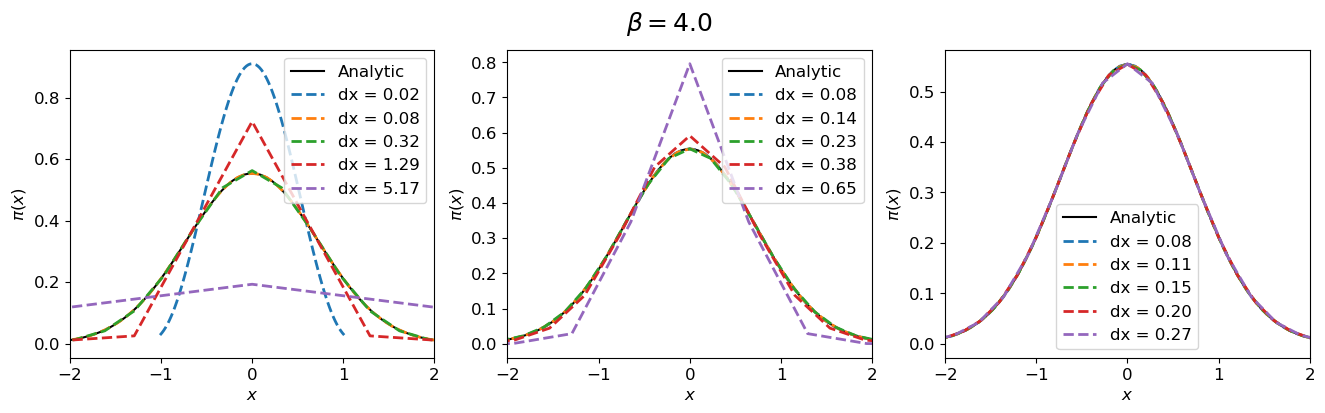

In [36]:
beta = 4.0                               # inverse temperature

xs_maxs = [2**np.linspace(0, 8, 5), 2**np.linspace(2, 5, 5), 2**np.linspace(2, 3.75, 5)]

fig, axs = plt.subplots(1, len(xs_maxs), figsize=(16, 4), sharex=True)
fig.suptitle(r'$\beta = {:.1f}$'.format(beta), fontsize=BIGGER_SIZE*1.5)

grid = np.linspace(-3, 3, 100)

last_pi_of_x = []
i = 0
for x_maxs, ax in zip(xs_maxs, axs):
    
    ax.plot(grid, [analytic_quantum_probability(d, beta) for d in grid], 'k-', label='Analytic')

    for x_max in x_maxs:
   
        x, dx, rho, Z, pi_of_x = convolution(x_max, nx, beta, harmonic_potential)
        
        if i==len(xs_maxs)-1:
            last_pi_of_x.append([dx, x, pi_of_x]) 

        ax.plot(x, pi_of_x, '--', linewidth=2, label='dx = {:.2f}'.format(dx))

        ax.legend()
        ax.set_xlabel(r'$x$')
        ax.set_ylabel(r'$\pi(x)$')
        ax.set_xlim(-2, 2)

    i += 1

In [37]:
last_pi_of_x = np.array(last_pi_of_x)

Text(0, 0.5, 'abs($\\pi(x)$_theorical - $\\pi(x)$_numerical)')

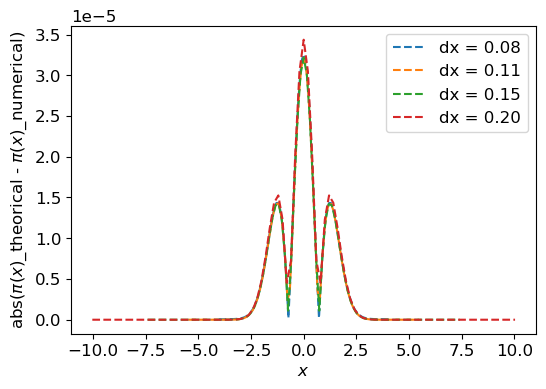

In [38]:
plt.figure(figsize=(6, 4))
for i in range(0, len(last_pi_of_x)-1):
    theorical = [analytic_quantum_probability(d, beta) for d in last_pi_of_x[i][1]]
    plt.plot(last_pi_of_x[i][1], abs(theorical-last_pi_of_x[i][2]), '--', label='dx = {:.2f}'.format(last_pi_of_x[i][0]))
plt.legend()
plt.xlabel(r'$x$')
plt.ylabel(r'abs($\pi(x)$_theorical - $\pi(x)$_numerical)')

#### Variando $\beta$ temp usando un x_max fijo

In [39]:
Z_theoric = lambda beta: 1/(2*np.sinh(beta/2))

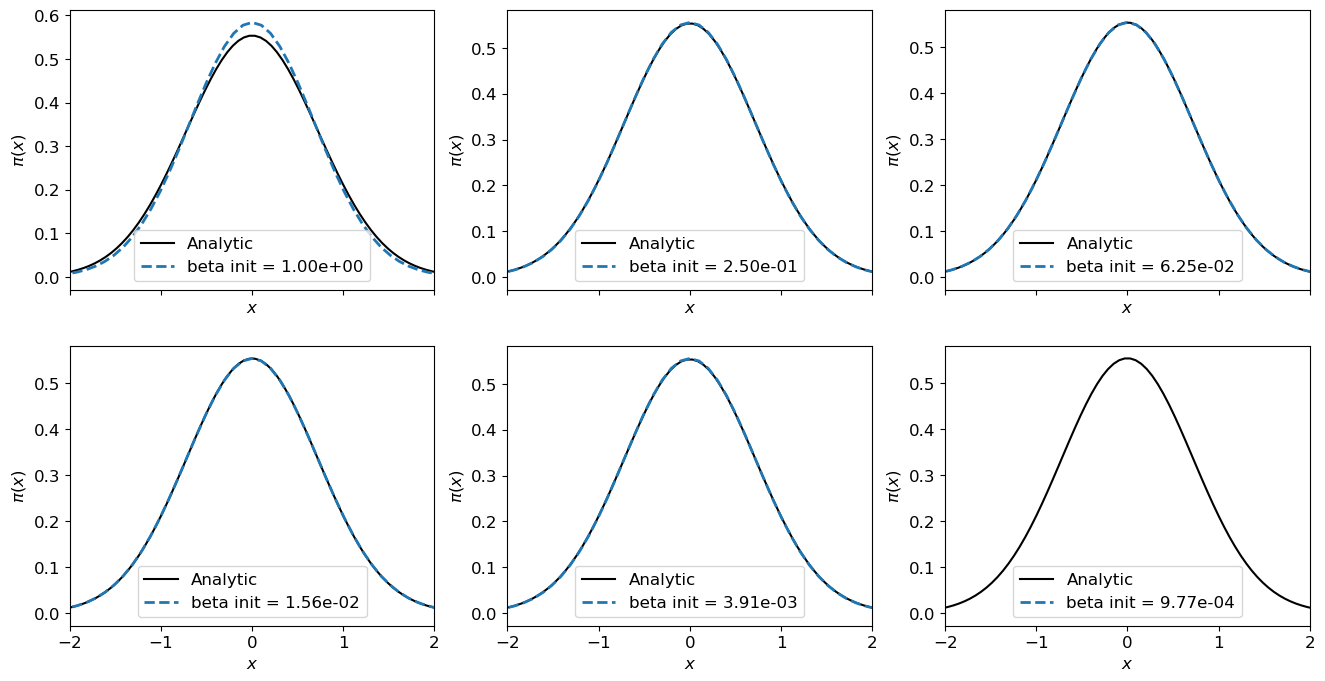

In [40]:
nx = 100                               # number of points in the grid
x_max = 5.0                             # inverse temperature
beta = 4.0                               # inverse temperature

fig, axs = plt.subplots(2, 3, figsize=(16, 8), sharex=True)
axs = axs.ravel()

for i, ax in zip(range(0, 12, 2), axs):

    ax.plot(grid, [analytic_quantum_probability(d, beta) for d in grid], 'k-', label='Analytic')
    x, dx, rho, Z, pi_of_x = convolution(x_max, nx, 
                                        beta, 
                                        harmonic_potential, 
                                        beta_temp=2.0 ** (-i), 
                                        )
    
    ax.plot(x, pi_of_x, '--', linewidth=2, label='beta init = {:.2e}'.format(2.0 ** (-i)))
    ax.legend()
    ax.set_xlabel(r'$x$')
    ax.set_ylabel(r'$\pi(x)$')
    ax.set_xlim(-2, 2)

https://blog.cupcakephysics.com/thermodynamics%20and%20statistical%20physics/2015/10/04/thermodynamic-properties-of-the-quantum-harmonic-oscillator.html



In [52]:
# nx = 100                               # number of points in the grid
# x_max = 5.0                             # inverse temperature
# beta = 4.0                               # inverse temperature
# 
# fig, axs = plt.subplots(2, 3, figsize=(16, 8))
# axs = axs.ravel()
# 
# for i, ax in zip(range(0, 12, 2), axs):
# 
#     x, dx, rho, betas, Zs = convolution(x_max, nx, 
#                                         beta, 
#                                         harmonic_potential, 
#                                         beta_temp=2.0 ** (-i), 
#                                         return_betas_Zs=True)
#     ax.plot(betas, np.log(Zs), 'o', linewidth=2, label='beta init = {:.2e}'.format(2.0 ** (-i)))
#     ax.legend()

In [42]:
nx = 100                               # number of points in the grid
x_max = 5.0                             # inverse temperature

n_plots = 5
betas = 2.0 ** np.linspace(0.01, 10, 10)

Z_values = []

for beta in betas:
   
    x, dx, rho, Z, pi_of_x = convolution(x_max, nx, beta, harmonic_potential, beta_temp=2.0 ** (-6))
    Z_values.append(Z)

In [43]:
m, b = np.polyfit(betas, np.log(Z_values), 1)
m, b

(-0.5015990259510431, -6.62431148220002)

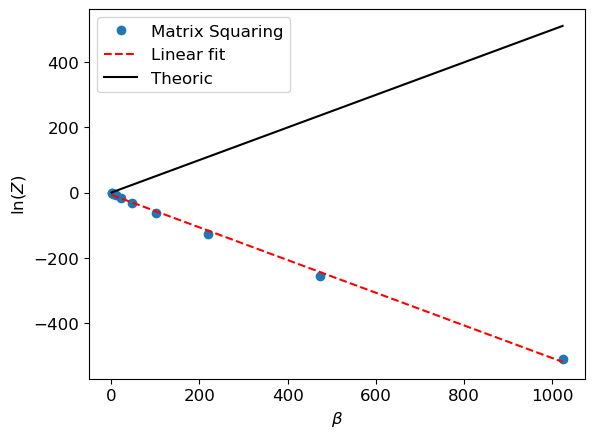

In [44]:
plt.plot(betas, np.log(Z_values), 'o', label='Matrix Squaring')
plt.plot(betas, m*betas+b, 'r--', label='Linear fit')
plt.plot(betas, -np.log(Z_theoric(betas)), 'k-', label='Theoric')
plt.xlabel(r'$\beta$')
plt.ylabel(r'$\ln(Z)$')
plt.legend()

## Integrales de Camino (Path Integral)

In [45]:
# Define the path integral Monte Carlo algorithm

def path_integral(potential, beta, N, delta, n_steps):
    """Path integral Monte Carlo algorithm
    Args:
        potential (function): potential energy function
        beta (float): inverse temperature
        N (int): number of particles
        delta (float): maximum displacement
        n_steps (int): number of steps
    Returns:
        list: first path
        list: k-th path
        list: all paths
    """
    dtau = beta / N
    x = [0.0] * N

    x_0 = []
    x_k = []
    xs = []

    for step in range(n_steps):
        k = np.random.randint(0, N)
        knext, kprev = (k + 1) % N, (k - 1) % N

        x_new = x[k] + np.random.uniform(-delta, delta)

        old_weight  = (rho_free(x[knext], x[k], dtau) * rho_free(x[k], x[kprev], dtau) * np.exp(- dtau * potential(x[k])) )
        new_weight  = (rho_free(x[knext], x_new, dtau) * rho_free(x_new, x[kprev], dtau) * np.exp(-  dtau * potential(x_new)) ) 

        if np.random.uniform(0.0, 1.0) < (new_weight / old_weight):
            x[k] = x_new

        xs.append(x)

        if step%10 == 0:
            x_0.append(x[0])
            x_k.append(x[4])

    return x_0, x_k, xs

### $\pi(x)$ cuando $\beta = 4$ para un oscilador armónico usando integrales de camino

In [46]:
beta = 4.0 
N = 10
delta = 1.0
n_steps = 500000

x_0, x_k, xs = path_integral(harmonic_potential, beta, N, delta, n_steps)

Text(0, 0.5, '$\\pi(x)$')

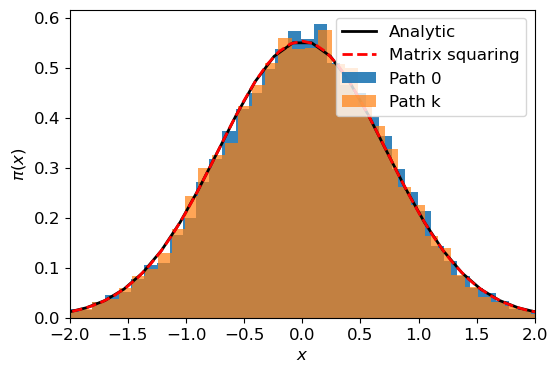

In [47]:
list_x, list_y = read_file('data_harm_matrix_squaring_beta4.0.dat')

plt.figure(figsize=(6, 4))
plt.plot(new_grid, [analytic_quantum_probability(x, beta) for x in new_grid], 'k-', linewidth=2, label='Analytic')
plt.plot(list_x, list_y, 'r--', linewidth=2, label='Matrix squaring')
plt.hist(x_0, density=True, bins=50, alpha=0.9, label='Path 0')
plt.hist(x_k, density=True, bins=50, alpha=0.7, label='Path k')
plt.legend()
plt.xlim(-2, 2) 
plt.xlabel(r'$x$')
plt.ylabel(r'$\pi(x)$')

## Pontencial anarmonico

Text(0, 0.5, '$V(x)$')

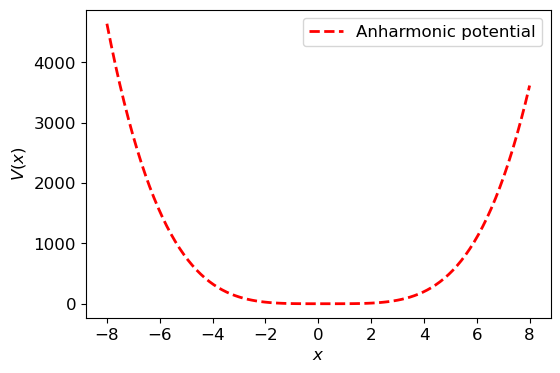

In [48]:
plt.figure(figsize=(6, 4))
plt.plot(new_grid, anharmonic_potential(new_grid), 'r--', linewidth=2, label='Anharmonic potential')
plt.legend()
plt.xlabel(r'$x$')
plt.ylabel(r'$V(x)$')

(-2.0, 2.0)

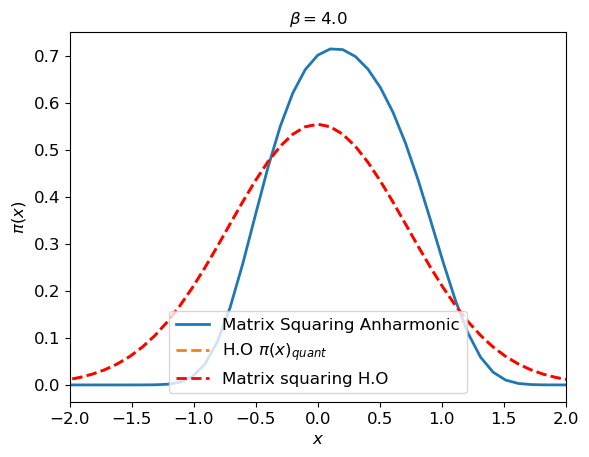

In [49]:
x_max = 5.0                              # maximum value of the position
nx = 100                                # number of points in the grid
beta = 4.0                               # inverse temperature

x, dx, rho, Z, pi_of_x = convolution(x_max, nx, beta, anharmonic_potential, True)

f = open('data_anharm_matrix_squaring_beta' + str(beta) + '.dat', 'w')
for j in range(nx + 1):
    f.write(str(x[j]) + ' ' + str(rho[j, j] / Z) + '\n')
f.close()

plt.figsize=(6, 4)
plt.title(r'$\beta = %s$' % beta)
plt.plot(x, pi_of_x, linewidth=2, label='Matrix Squaring Anharmonic')
plt.plot(x, [analytic_quantum_probability(x, beta) for x in x], '--', linewidth=2, label='H.O $\pi(x)_{quant}$')
plt.plot(list_x, list_y, 'r--', linewidth=2, label='Matrix squaring H.O') 
plt.legend()
plt.xlabel(r'$x$')
plt.ylabel(r'$\pi(x)$')
plt.xlim(-2, 2)

In [50]:
beta = 4.0 
N = 10
delta = 1.0
n_steps = 500000

x_0, x_k, xs = path_integral(anharmonic_potential, beta, N, delta, n_steps)

Text(0, 0.5, '$\\pi(x)$')

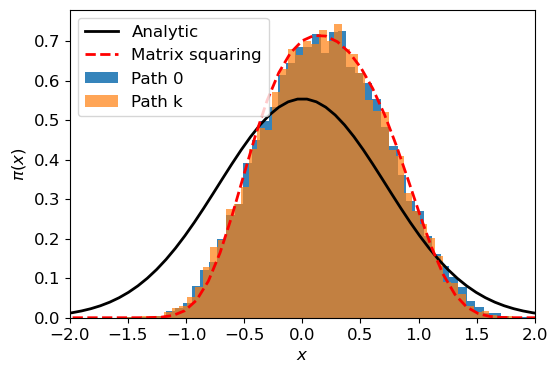

In [51]:
list_x, list_y = read_file('data_anharm_matrix_squaring_beta4.0.dat')

plt.figure(figsize=(6, 4))
new_grid = np.linspace(-4, 4, 100)
plt.plot(new_grid, [analytic_quantum_probability(x, beta) for x in new_grid], 'k-', linewidth=2, label='Analytic')
plt.plot(list_x, list_y, 'r--', linewidth=2, label='Matrix squaring')
plt.hist(x_0, density=True, bins=50, alpha=0.9, label='Path 0')
plt.hist(x_k, density=True, bins=50, alpha=0.7, label='Path k')
plt.legend()
plt.xlim(-2, 2) 
plt.xlabel(r'$x$')
plt.ylabel(r'$\pi(x)$')

- Realice también las comparaciones de $\pi(x)$ entre un
potencial armónico y uno anarmónico en la misma gráfica para los
programas de las secciones matrix-squaring y path-integral.